# Maximum Likelihood

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize 

In [13]:
# Generate some synthetic data 

# first that independent variable 
x = np.linspace(-10, 30, 100)

# generate a normally distributed noise
e = np.random.normal(0, 5, 100)

# generate ground truth
y = 10 + 4*x + e

# put data into a dataframe
df = pd.DataFrame({'x':x, 'y':y})

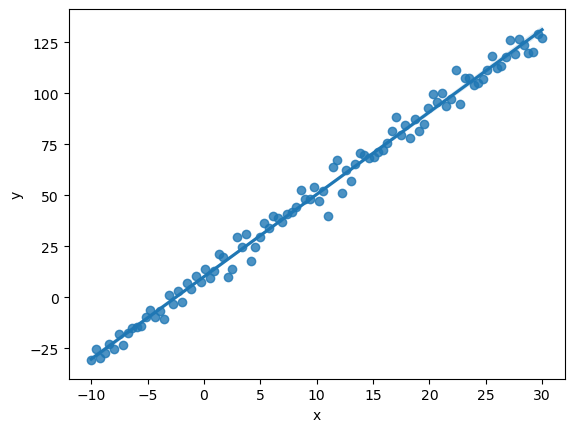

In [14]:
# Visualize the synthetic data on Seaborn’s regression plot.
sns.regplot(x='x', y='y', data = df);

In [15]:
# Calculate the OLS fit (ordinary least squares)
from statsmodels import api
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          1.74e-102
Time:                        17:23:38   Log-Likelihood:                -290.95
No. Observations:                 100   AIC:                             585.9
Df Residuals:                      98   BIC:                             591.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0696      0.591     17.045      0.000       8.897      11.242
x              4.0348      0.038    104.928      0.000       3.959       4.111
==============================================================================
Omnibus:                        1.705   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.161
Skew:                          -0.132   Prob(JB):                        0.560
Kurtosis:                       3.457   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Now do Maximum Likelihood Estimation

# ml modeling and neg LL calculation
def MLE_Norm(parameters):
    
    # extract parameters
    const, beta, std_dev = parameters
    
    # predict the output
    pred = const + beta*x
    
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, loc=pred, scale=std_dev))
    # return probability to observe y for a normal model with mu=pred and std=std_dev
    # see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
    
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [17]:
# Minimize the negative log-likelihood of the generated data
# using the minimize method from SciPy’s optimize module.

# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([0,1,1]), method='L-BFGS-B')

# What this does is execute the given function several times 
# and return the parameters for which the given function returned the smallest value.

# documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

mle_model 

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 290.95401174635117
        x: [ 1.007e+01  4.035e+00  4.440e+00]
      nit: 29
      jac: [ 0.000e+00  1.705e-05 -1.705e-05]
     nfev: 128
     njev: 32
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [18]:
# --->>> Your Turn <<<---
# change the data generation to create a quadratic function
# what else do you have to change then?